# Peer-Graded K-Means and Spectral Clustering

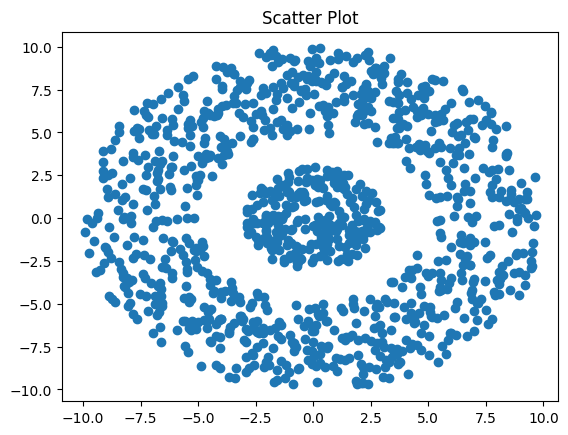

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

data = np.genfromtxt('ConcentricCircles.csv', delimiter=',')[1:,1:]

# Create a scatter plot
plt.scatter(data[:,0], data[:,1])
plt.title('Scatter Plot')

# Show the plot
plt.show()

The data points form a central cloud surrounded by an outer ring of points. There are two distict clusters: the interior cluster and the outer ring.

### Part (b)

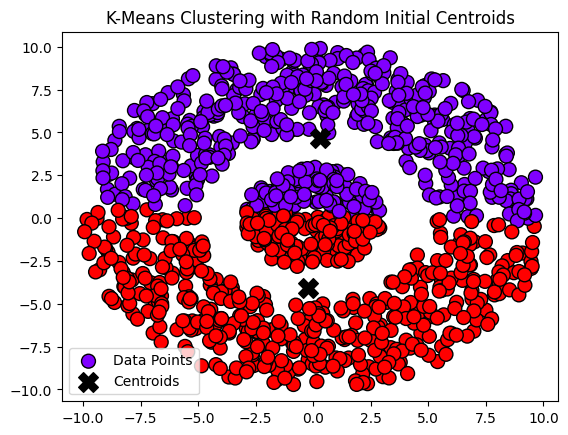

In [17]:
# Create KMeans object with random initialization
kmeans = KMeans(n_clusters=2)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the final centroid positions
centroids = kmeans.cluster_centers_

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Scatter plot of data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')

# Scatter plot of final centroid positions
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Set labels and legend
plt.title('K-Means Clustering with Random Initial Centroids')
plt.legend()

# Show the plot
plt.show()

This K-Means method does a poor job of clustering the data. The method simply cuts the data points into upper and lower halves, rather than properly identifying the inner and outer clusters.

### Part (c)

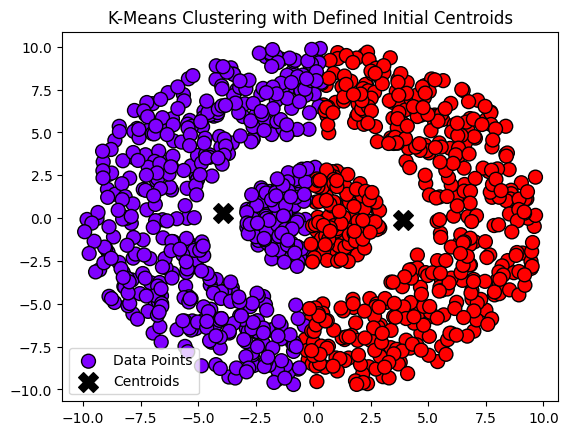

In [18]:
# Custom initial centroid locations
initial_centroids = np.array([[-8,0], [1,-1]])

# Create KMeans object with random initialization
kmeans = KMeans(n_clusters=2, init=initial_centroids)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the final centroid positions
centroids = kmeans.cluster_centers_

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Scatter plot of data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')

# Scatter plot of final centroid positions
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Set labels and legend
plt.title('K-Means Clustering with Defined Initial Centroids')
plt.legend()

# Show the plot
plt.show()

This method does no better in properly identifying the clusters than the random centroid initialization method. Rather than splitting the data into upper and lower halves, this method splits the data into left and right halves.

### Part (d)

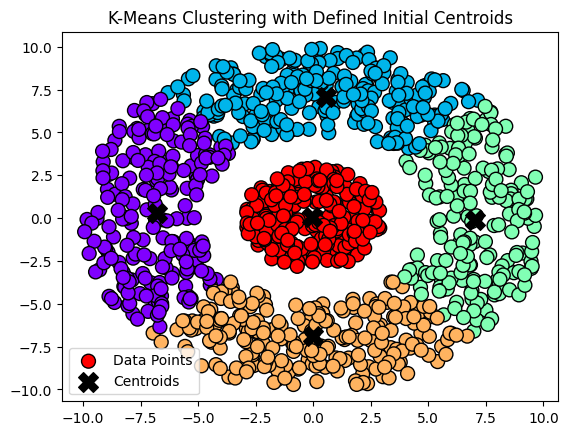

In [19]:
# Custom initial centroid locations
initial_centroids = np.array([[-7.5,0], [0,7.5], [7.5,0], [0,-7.5], [0,0]])

# Create KMeans object with random initialization
kmeans = KMeans(n_clusters=5, init=initial_centroids)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the final centroid positions
centroids = kmeans.cluster_centers_

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Scatter plot of data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')

# Scatter plot of final centroid positions
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Set labels and legend
plt.title('K-Means Clustering with Defined Initial Centroids')
plt.legend()

# Show the plot
plt.show()

This method accurately identifies the central cluster of points, but it incorrectly breaks the outer cluster into four partitions. This is not a very good method for correctly identifying the true clusters.

### Part (e)

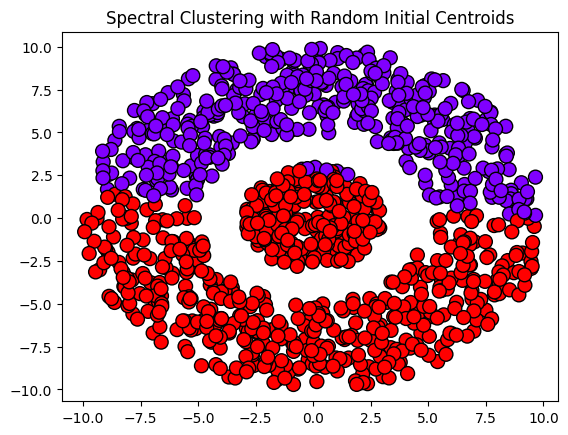

In [20]:
def spect_clust(s):
    # Find A matrix
    A = np.empty((data.shape[0],data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            A[i,j] = np.exp(-np.linalg.norm(data[i]-data[j])**2 / (2*s**2))
        A[i,i] = 0

    # Calculate the D and L matrices
    D = np.squeeze(np.asarray(np.sum(A,axis = 1)))
    L = np.diag(D**(-0.5)) @ A @ np.diag(D**(-0.5)) 

    # Find eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(L)

    # Collect matrix Y and normalize
    Y = eigenvectors[:,0:2]
    Y = np.transpose(np.transpose(Y)/np.linalg.norm(Y,axis = 1))

    # Perform K-Means on rows of Y and plot
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(Y)
    labels = kmeans.labels_
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')
    plt.title('Spectral Clustering with Random Initial Centroids')
    plt.show()

spect_clust(s=1.5)

This spectral clustering method does not accurately cluster the data points. This clustering is very similar to the original K-Means, as it breaks the points roughly into upper and lower halves.

### Part (f)

Spectral clustering with s = 0.1:


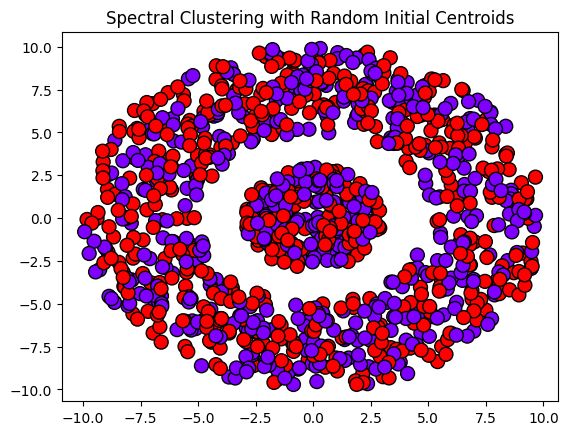

Spectral clustering with s = 1:


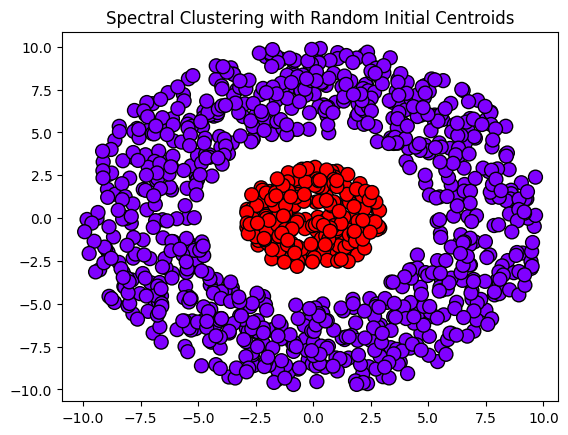

Spectral clustering with s = 2:


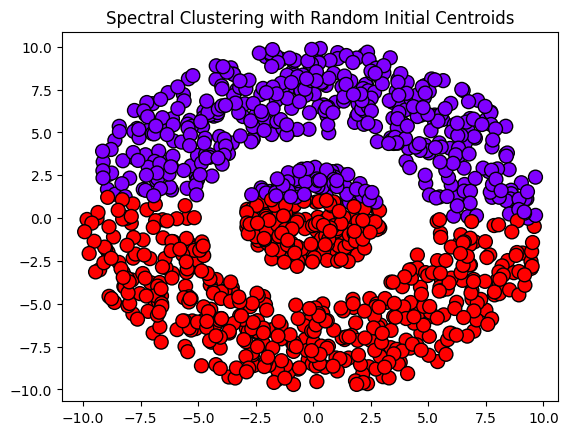

In [21]:
s_list = [0.1, 1, 2]
for s in s_list:
    print(f'Spectral clustering with s = {s}:')
    spect_clust(s)

The appropriate clustering occurs with a sigma value of 1.

A sigma value of 0.1 causes the two clusters to intermingle all throughout the distribution of the data. A sigma value of 1 yields the correct clustering. A sigma value of 2 splits the data into upper and lower halves, similar to the original K-Means method.